<a href="https://colab.research.google.com/github/Bilol2747/python_darslarim/blob/main/Decision_Tree_Classifier_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import tree
%matplotlib inline

In [ ]:
df= pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [ ]:
x=df.drop('Drug', axis=1).values
y=df['Drug'].values


In [ ]:
x_tr, x_te, y_tr, y_te =train_test_split(x, y, test_size=0.4, random_state=54)

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_tr, y_tr)
y_predict=tree_model.predict(x_te)
print(classification_report(y_te, y_predict))

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.78      0.88         9
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.95      0.97        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.97      0.96      0.96        80



In [ ]:
print(metrics.accuracy_score(y_te, y_predict))

0.9625


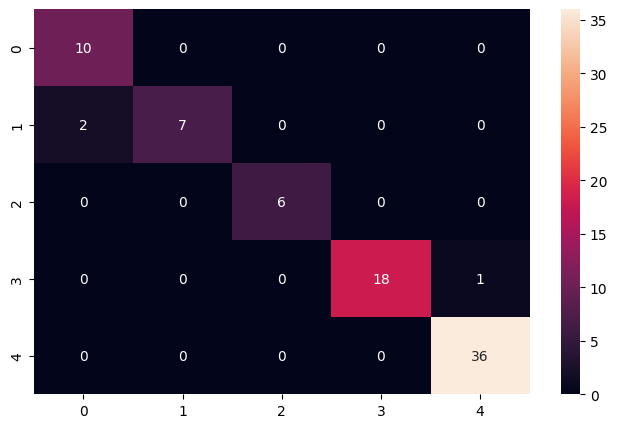

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_te, y_predict), annot=True)
plt.show()

In [ ]:
predict=cross_val_predict(estimator=tree_model, X=x, y=y, cv=5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



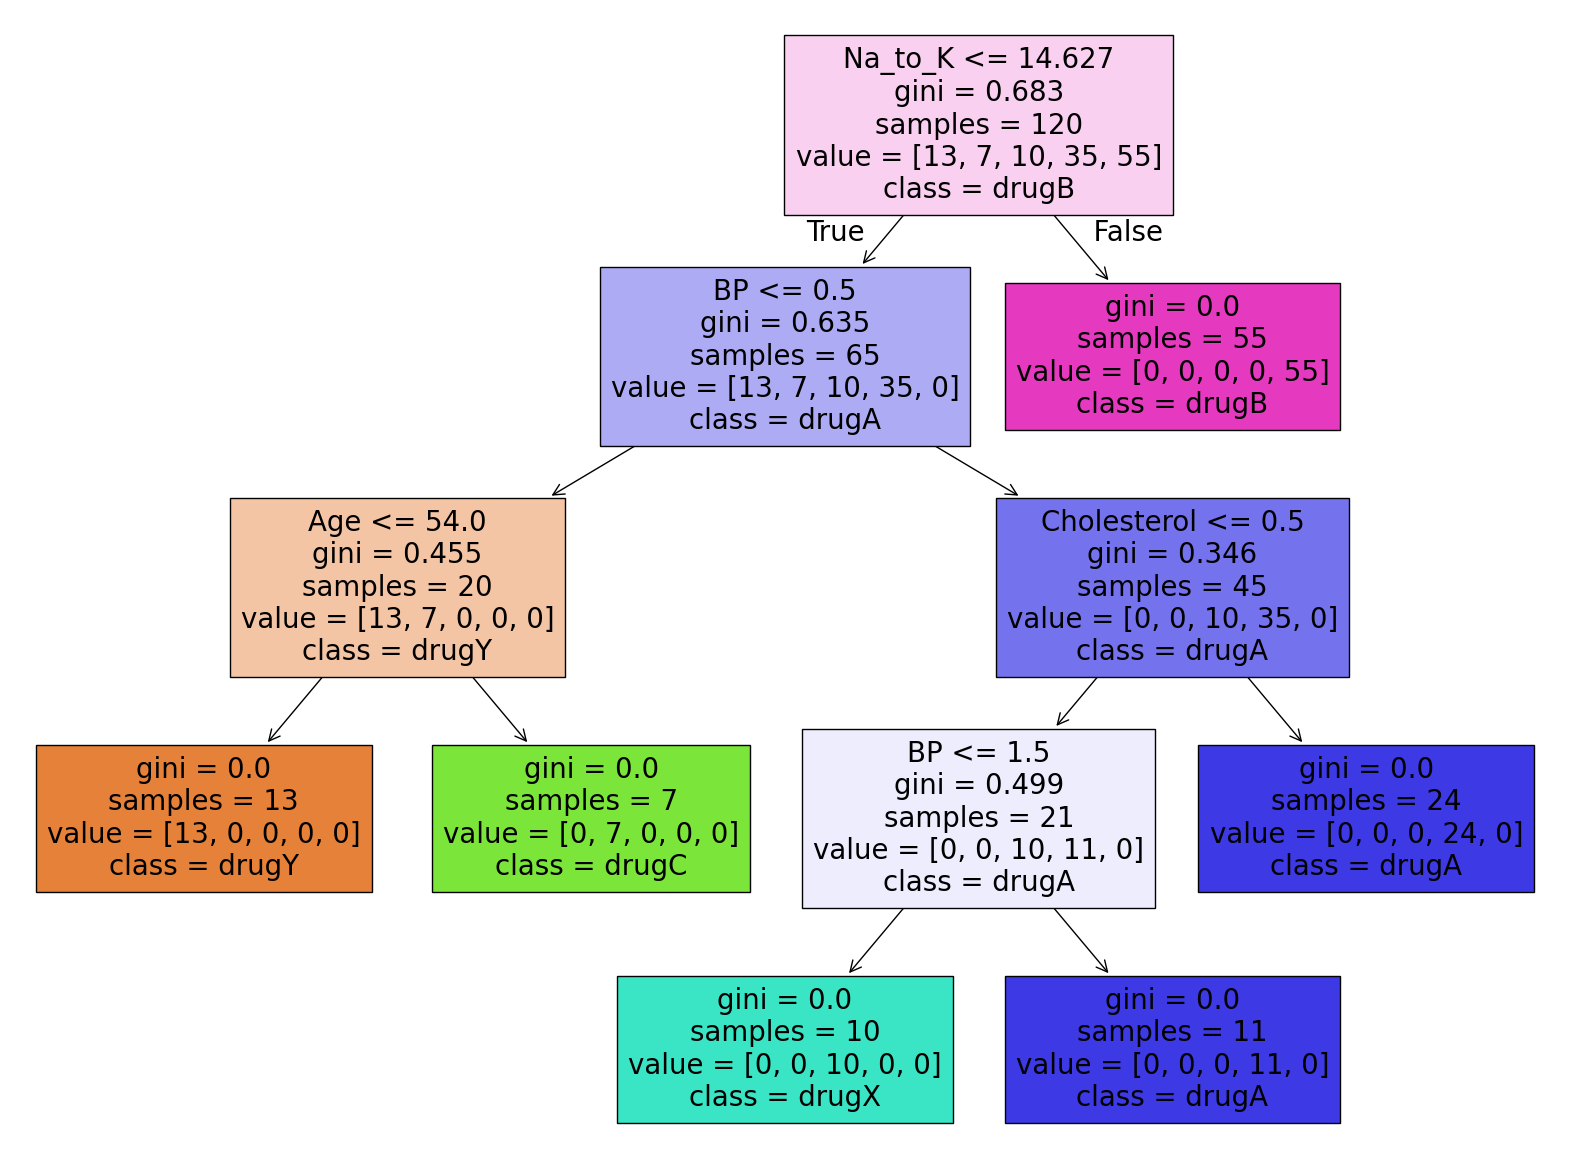

In [ ]:
cols= df.drop('Drug', axis=1).columns
classes=df['Drug'].unique()
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True )
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.78      0.88         9
       drugC       0.00      0.00      0.00         6
       drugX       0.75      0.95      0.84        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.89        80
   macro avg       0.71      0.75      0.72        80
weighted avg       0.83      0.89      0.85        80



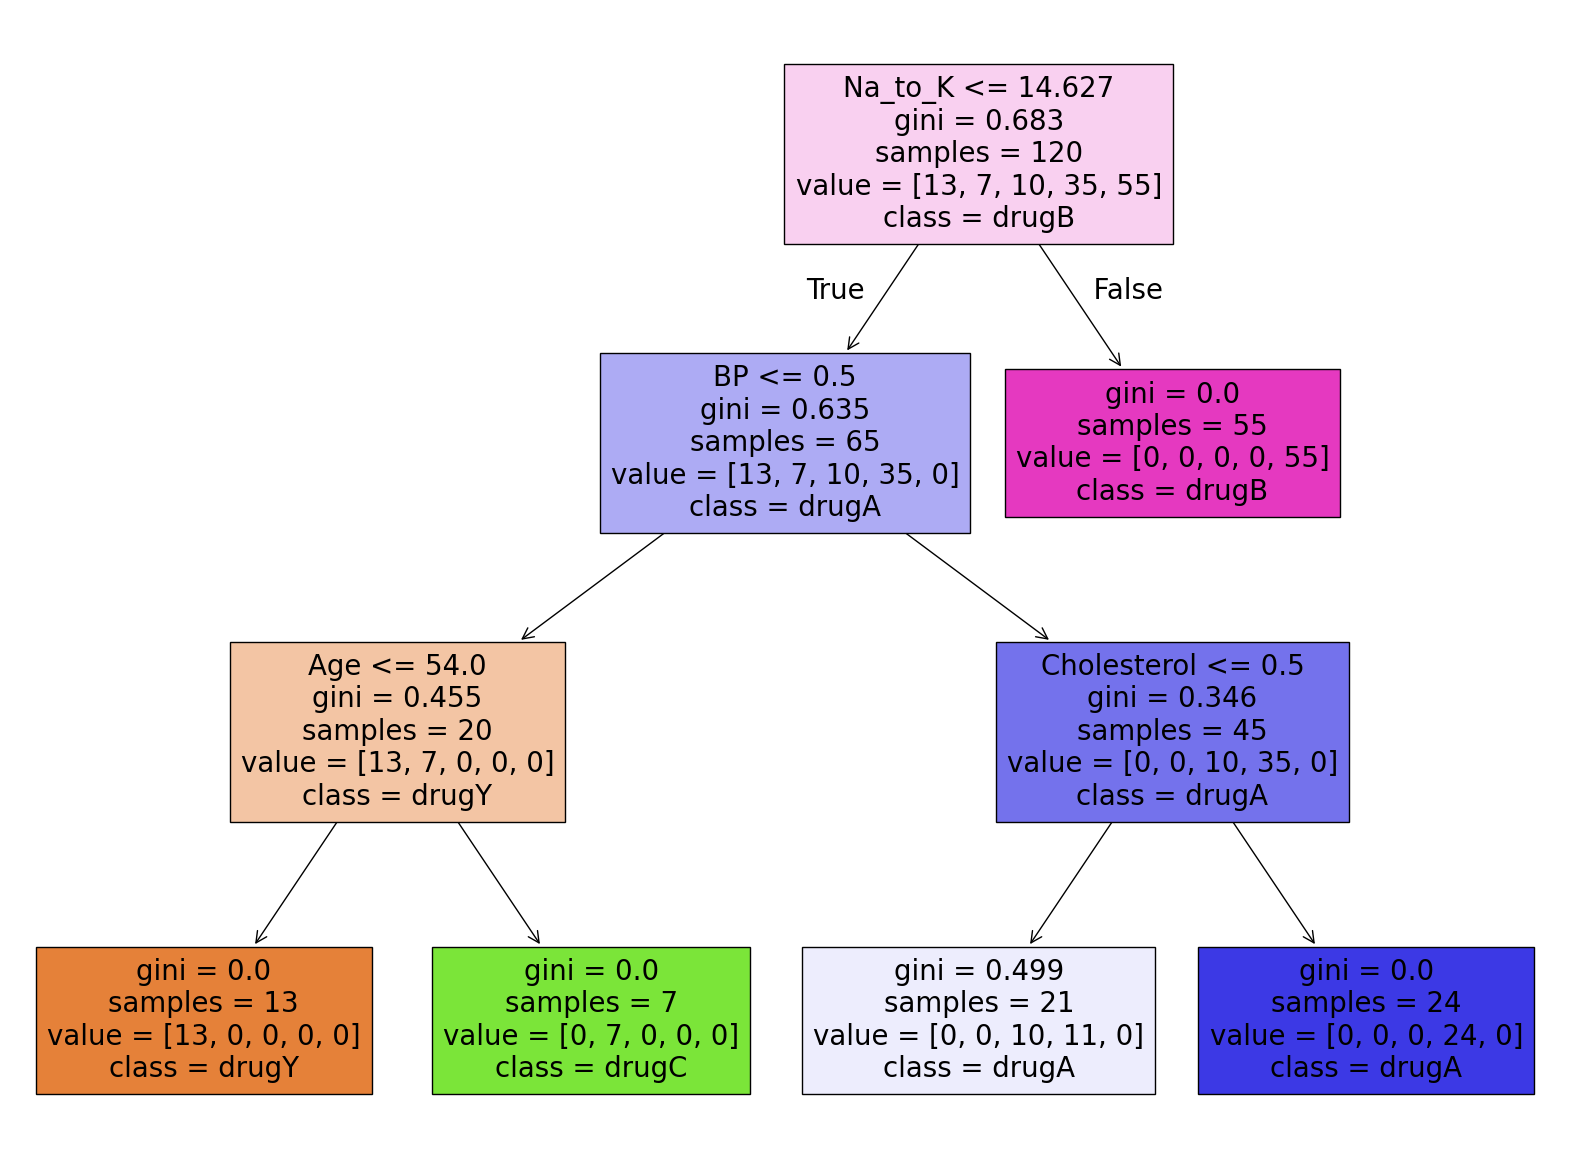

In [ ]:
tree_model=DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(x_tr, y_tr)
y_predict=tree_model.predict(x_te)
print(classification_report(y_te, y_predict))
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True )
plt.show()


In [ ]:
tree_model=DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(x_tr, y_tr)
y_predict=tree_model.predict(x_te)
print(classification_report(y_te, y_predict))
plt.figure(figsize=(20, 15))
#tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True )
plt.show()


              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.78      0.88         9
       drugC       0.00      0.00      0.00         6
       drugX       0.75      0.95      0.84        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.89        80
   macro avg       0.71      0.75      0.72        80
weighted avg       0.83      0.89      0.85        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 2000x1500 with 0 Axes>

In [ ]:
random_model= RandomForestClassifier()
random_model.fit(x_tr, y_tr)
r_predict=tree_model.predict(x_te)
print(classification_report(y_te, r_predict))

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.78      0.88         9
       drugC       0.00      0.00      0.00         6
       drugX       0.75      0.95      0.84        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.89        80
   macro avg       0.71      0.75      0.72        80
weighted avg       0.83      0.89      0.85        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_tr, y_tr)
y_predict=tree_model.predict(x_te)
print(classification_report(y_te, y_predict))

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91        10
       drugB       1.00      0.78      0.88         9
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.95      0.97        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.97      0.96      0.96        80

